# Artificial Neural Networks - Homework

### Fashion MNIST
There is just one task this time: Repeat the training part of the notebook we used in class replacing the MNIST dataset with [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), but also do some experimentation with the MLP-Parameters
* $n_h$: number of hidden layers
* $m_j,\>j=1,\dots,n_h$: number of neurons in the $j$-th hidden layer

# Classifying fashion pictures

The Fashion-MNIST dataset is meant to be a drop-in replacement for MNIST. It also consists of $28 \times 28$ pixel images, where each pixel is represented by a gray scale value. Therefore, we have $28\times28=784$ *features* per row, so the images are then *unrolled* into vectors of length $784$ and each one in both the training set as well as the test set is given a *class label* of $0-9$ corresponding to the type of fashion item it represents.

## Obtaining the Fashion-MNIST dataset

The Fashion-MNIST dataset is publicly available on [GitHub](https://github.com/zalandoresearch/fashion-mnist). After that, everything works just like before ...


In [1]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' 
                                % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' 
                               % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [2]:
X_train, y_train = load_mnist('fashion-mnist/data/fashion', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
X_test, y_test = load_mnist('fashion-mnist/data/fashion', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Visualize the **seventeenth** object of each class:

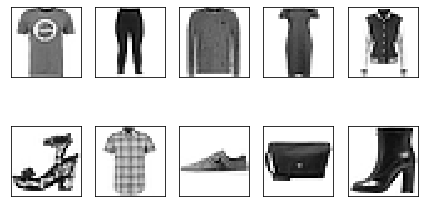

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][7].reshape(28, 28) # the 7th representative of each digit
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

## Visualize 25 different versions of sandals:

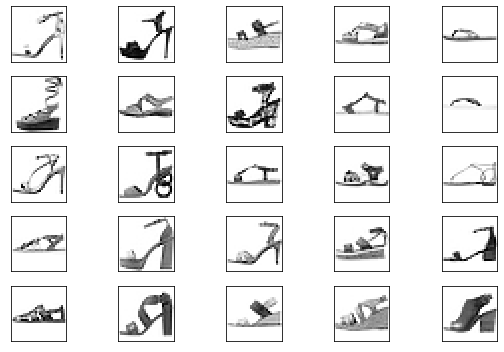

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 5))
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 5][i].reshape(28, 28)  #5 = sandal
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

## Classification using a multi-layer perceptron

Use `scikit learn`'s `MLPClassifier` to train various models with
* different numbers of hidden layers
* different numbers of neurons in the hidden layers

For each variant you try out record:
* how *long* it took to train the network
* how many epochs were necessary
* how the loss values evolved over the epochs
* the accuracy
  + on the training data
  + on the test data

In [5]:
from sklearn.neural_network import MLPClassifier
import datetime as dt

In [7]:
nn_h2_n50 = MLPClassifier(hidden_layer_sizes=(50,50), # 2 hidden layers, 50 neurons each
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

In [8]:
start_nn_h2_n50 = dt.datetime.now()
nn_h2_n50.fit(X_train, y_train)
end_nn_h2_n50 = dt.datetime.now()
epochs_nn_h2_n50 = nn_h2_n50.n_iter_

Iteration 1, loss = 2.04103830
Iteration 2, loss = 1.48906078
Iteration 3, loss = 1.14108453
Iteration 4, loss = 0.93086306
Iteration 5, loss = 0.80294885
Iteration 6, loss = 0.72743075
Iteration 7, loss = 0.68770519
Iteration 8, loss = 0.67355701
Iteration 9, loss = 0.65600308
Iteration 10, loss = 0.66107824
Iteration 11, loss = 0.65102899
Iteration 12, loss = 0.64660295
Iteration 13, loss = 0.63861272
Iteration 14, loss = 0.63147575
Iteration 15, loss = 0.62410340
Iteration 16, loss = 0.63239846
Iteration 17, loss = 0.63414014
Iteration 18, loss = 0.63052081
Iteration 19, loss = 0.63587173
Iteration 20, loss = 0.62188395
Iteration 21, loss = 0.62342645
Iteration 22, loss = 0.64385951
Iteration 23, loss = 0.64256729
Iteration 24, loss = 0.61702818
Iteration 25, loss = 0.62126312
Iteration 26, loss = 0.60494440
Iteration 27, loss = 0.62253020
Iteration 28, loss = 0.61890343
Iteration 29, loss = 0.61056641
Iteration 30, loss = 0.61668614
Iteration 31, loss = 0.63001833
Iteration 32, los

In [9]:
print('It took {} to train the neural network'.format(end_nn_h2_n50-start_nn_h2_n50))

It took 0:00:57.197704 to train the neural network


In [10]:
epochs_nn_h2_n50

54

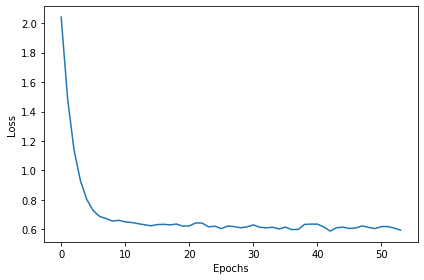

In [11]:
%matplotlib inline
loss_values = nn_h2_n50.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [12]:
y_train_pred = nn_h2_n50.predict(X_train)

acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 79.74%


In [13]:
y_test_pred = nn_h2_n50.predict(X_test)

acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 78.66%


In [14]:
nn_h5_n50 = MLPClassifier(hidden_layer_sizes=(50,50,50,50,50), # 5 hidden layers, 50 neurons each
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

In [15]:
start_nn_h5_n50 = dt.datetime.now()
nn_h5_n50.fit(X_train, y_train)
end_nn_h5_n50d = dt.datetime.now()
epochs_nn_h5_n50 = nn_h5_n50.n_iter_

Iteration 1, loss = 2.30587495
Iteration 2, loss = 2.30444210
Iteration 3, loss = 2.30439184
Iteration 4, loss = 2.30425077
Iteration 5, loss = 2.30423139
Iteration 6, loss = 2.30427049
Iteration 7, loss = 2.30417851
Iteration 8, loss = 2.30434746
Iteration 9, loss = 2.30405584
Iteration 10, loss = 2.30407746
Iteration 11, loss = 2.30426155
Iteration 12, loss = 2.30408410
Iteration 13, loss = 2.30426060
Iteration 14, loss = 2.30415087
Iteration 15, loss = 2.30404003
Iteration 16, loss = 2.30408839
Iteration 17, loss = 2.30418673
Iteration 18, loss = 2.30403371
Iteration 19, loss = 2.30401487
Iteration 20, loss = 2.30411113
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [16]:
print('It took {} to train the neural network'.format(end_nn_h5_n50d-start_nn_h5_n50))

It took 0:00:28.451747 to train the neural network


In [17]:
epochs_nn_h5_n50

20

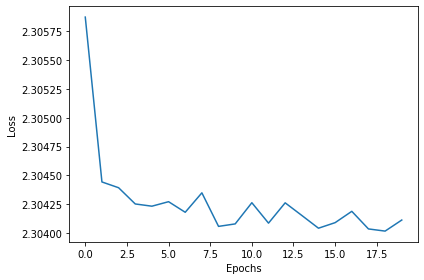

In [18]:
%matplotlib inline
loss_values = nn_h5_n50.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [19]:
y_train_pred = nn_h5_n50.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 10.00%


In [20]:
y_test_pred = nn_h5_n50.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 10.00%


In [21]:
nn_h1_n50 = MLPClassifier(hidden_layer_sizes=(50), # 1 hidden layer
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

In [22]:
start_nn_h1_n50 = dt.datetime.now()
nn_h1_n50.fit(X_train, y_train)
end_nn_h1_n50 = dt.datetime.now()
epochs_nn_h1_n50 = nn_h1_n50.n_iter_

Iteration 1, loss = 1.08310708
Iteration 2, loss = 0.71665101
Iteration 3, loss = 0.66843515
Iteration 4, loss = 0.63962299
Iteration 5, loss = 0.61446677
Iteration 6, loss = 0.60515602
Iteration 7, loss = 0.58864392
Iteration 8, loss = 0.59594233
Iteration 9, loss = 0.58862617
Iteration 10, loss = 0.58903457
Iteration 11, loss = 0.58714941
Iteration 12, loss = 0.57338779
Iteration 13, loss = 0.58843159
Iteration 14, loss = 0.57989940
Iteration 15, loss = 0.57980886
Iteration 16, loss = 0.58669522
Iteration 17, loss = 0.59788019
Iteration 18, loss = 0.60389659
Iteration 19, loss = 0.58710175
Iteration 20, loss = 0.57560181
Iteration 21, loss = 0.58008045
Iteration 22, loss = 0.59097255
Iteration 23, loss = 0.57813314
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [23]:
print('It took {} to train the neural network'.format(end_nn_h1_n50-start_nn_h1_n50))

It took 0:00:21.876809 to train the neural network


In [24]:
epochs_nn_h1_n50

23

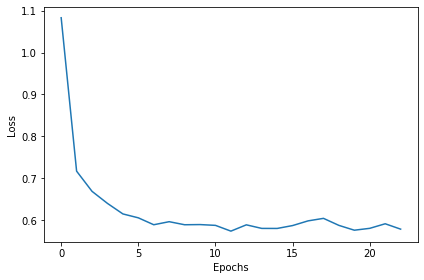

In [25]:
%matplotlib inline
loss_values = nn_h1_n50.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [26]:
y_train_pred = nn_h1_n50.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 80.93%


In [27]:
y_test_pred = nn_h1_n50.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 79.47%


In [28]:
nn_h1_n100 = MLPClassifier(hidden_layer_sizes=(100), # 1 hidden layer, 100 neurons
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h1_n100 = dt.datetime.now()
nn_h1_n100.fit(X_train, y_train)
end_nn_h1_n100 = dt.datetime.now()
epochs_nn_h1_n100 = nn_h1_n100.n_iter_

Iteration 1, loss = 0.94765832
Iteration 2, loss = 0.65751345
Iteration 3, loss = 0.61633747
Iteration 4, loss = 0.58830830
Iteration 5, loss = 0.58059204
Iteration 6, loss = 0.56892884
Iteration 7, loss = 0.57359755
Iteration 8, loss = 0.55863241
Iteration 9, loss = 0.55960953
Iteration 10, loss = 0.56185159
Iteration 11, loss = 0.57122596
Iteration 12, loss = 0.55738300
Iteration 13, loss = 0.56713928
Iteration 14, loss = 0.55638695
Iteration 15, loss = 0.56350188
Iteration 16, loss = 0.54878396
Iteration 17, loss = 0.55870526
Iteration 18, loss = 0.54694515
Iteration 19, loss = 0.55578098
Iteration 20, loss = 0.55605416
Iteration 21, loss = 0.54214436
Iteration 22, loss = 0.54599438
Iteration 23, loss = 0.54409238
Iteration 24, loss = 0.54545112
Iteration 25, loss = 0.53585419
Iteration 26, loss = 0.53005670
Iteration 27, loss = 0.53007059
Iteration 28, loss = 0.53887708
Iteration 29, loss = 0.53540220
Iteration 30, loss = 0.55786964
Iteration 31, loss = 0.55228509
Iteration 32, los

In [29]:
print('It took {} to train the neural network'.format(end_nn_h1_n100-start_nn_h1_n100))

It took 0:01:33.806508 to train the neural network


In [30]:
epochs_nn_h1_n100

63

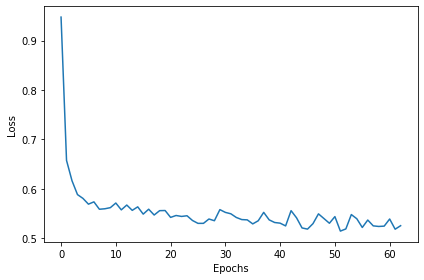

In [31]:
%matplotlib inline
loss_values = nn_h1_n100.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [39]:
y_train_pred = nn_h1_n100.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 81.81%


In [40]:
y_test_pred = nn_h1_n100.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 80.90%


In [34]:
nn_h1_n300 = MLPClassifier(hidden_layer_sizes=(300), # 1 hidden layer, 300 neurons
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h1_n300 = dt.datetime.now()
nn_h1_n300.fit(X_train, y_train)
end_nn_h1_n300 = dt.datetime.now()
epochs_nn_h1_n300 = nn_h1_n300.n_iter_

Iteration 1, loss = 0.76512068
Iteration 2, loss = 0.57586747
Iteration 3, loss = 0.54679526
Iteration 4, loss = 0.54113227
Iteration 5, loss = 0.53350462
Iteration 6, loss = 0.52766541
Iteration 7, loss = 0.51791519
Iteration 8, loss = 0.52154534
Iteration 9, loss = 0.52538223
Iteration 10, loss = 0.52427350
Iteration 11, loss = 0.52866384
Iteration 12, loss = 0.51911068
Iteration 13, loss = 0.52531173
Iteration 14, loss = 0.51521909
Iteration 15, loss = 0.51571167
Iteration 16, loss = 0.51711580
Iteration 17, loss = 0.51104529
Iteration 18, loss = 0.51434500
Iteration 19, loss = 0.51458906
Iteration 20, loss = 0.51380982
Iteration 21, loss = 0.51733963
Iteration 22, loss = 0.51772622
Iteration 23, loss = 0.52571883
Iteration 24, loss = 0.51738778
Iteration 25, loss = 0.51317903
Iteration 26, loss = 0.50883090
Iteration 27, loss = 0.51077077
Iteration 28, loss = 0.51996720
Iteration 29, loss = 0.51976498
Iteration 30, loss = 0.52760429
Iteration 31, loss = 0.53827453
Iteration 32, los

In [36]:
print('It took {} to train the neural network'.format(end_nn_h1_n300-start_nn_h1_n300))

It took 0:02:04.912461 to train the neural network


In [37]:
epochs_nn_h1_n300

37

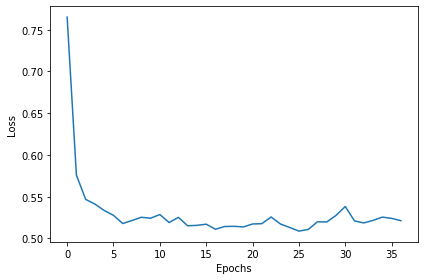

In [38]:
%matplotlib inline
loss_values = nn_h1_n300.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [ ]:
y_train_pred = nn_h1_n300.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

In [ ]:
y_test_pred = nn_h1_n300.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

In [42]:
nn_h2_n100 = MLPClassifier(hidden_layer_sizes=(100,100), # 2 hidden layer, 100 neurons each
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h2_n100 = dt.datetime.now()
nn_h2_n100.fit(X_train, y_train)
end_nn_h2_n100 = dt.datetime.now()
epochs_nn_h2_n100 = nn_h2_n100.n_iter_

Iteration 1, loss = 1.84866954
Iteration 2, loss = 1.14792999
Iteration 3, loss = 0.85308105
Iteration 4, loss = 0.71440122
Iteration 5, loss = 0.64266131
Iteration 6, loss = 0.60843934
Iteration 7, loss = 0.58581790
Iteration 8, loss = 0.56674136
Iteration 9, loss = 0.56626244
Iteration 10, loss = 0.56455115
Iteration 11, loss = 0.56227655
Iteration 12, loss = 0.56657484
Iteration 13, loss = 0.56794752
Iteration 14, loss = 0.56316448
Iteration 15, loss = 0.55867875
Iteration 16, loss = 0.55731222
Iteration 17, loss = 0.56456906
Iteration 18, loss = 0.55543254
Iteration 19, loss = 0.56317377
Iteration 20, loss = 0.57196048
Iteration 21, loss = 0.56986606
Iteration 22, loss = 0.57411415
Iteration 23, loss = 0.59542753
Iteration 24, loss = 0.57561951
Iteration 25, loss = 0.57028204
Iteration 26, loss = 0.58232359
Iteration 27, loss = 0.58645294
Iteration 28, loss = 0.58392293
Iteration 29, loss = 0.57648467
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

In [43]:
print('It took {} to train the neural network'.format(end_nn_h2_n100-start_nn_h2_n100))

It took 0:00:53.586542 to train the neural network


In [44]:
epochs_nn_h2_n100

29

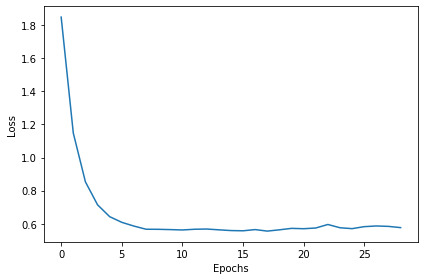

In [45]:
%matplotlib inline
loss_values = nn_h2_n100.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [46]:
y_train_pred = nn_h2_n100.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 80.29%


In [47]:
y_test_pred = nn_h2_n100.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 79.17%


In [48]:
nn_h2 = MLPClassifier(hidden_layer_sizes=(100,20), # 2 hidden layer, 100 and 20 neurons
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h2 = dt.datetime.now()
nn_h2.fit(X_train, y_train)
end_nn_h2 = dt.datetime.now()
epochs_nn_h2 = nn_h2.n_iter_

Iteration 1, loss = 1.96131955
Iteration 2, loss = 1.34121797
Iteration 3, loss = 1.01959012
Iteration 4, loss = 0.84828032
Iteration 5, loss = 0.74787326
Iteration 6, loss = 0.68393803
Iteration 7, loss = 0.64634826
Iteration 8, loss = 0.62230251
Iteration 9, loss = 0.60484912
Iteration 10, loss = 0.58687860
Iteration 11, loss = 0.58333428
Iteration 12, loss = 0.58321028
Iteration 13, loss = 0.57649947
Iteration 14, loss = 0.58199136
Iteration 15, loss = 0.58523482
Iteration 16, loss = 0.57395166
Iteration 17, loss = 0.55912832
Iteration 18, loss = 0.55829425
Iteration 19, loss = 0.58082509
Iteration 20, loss = 0.57401578
Iteration 21, loss = 0.58473235
Iteration 22, loss = 0.56950863
Iteration 23, loss = 0.59235009
Iteration 24, loss = 0.58037497
Iteration 25, loss = 0.58867915
Iteration 26, loss = 0.55764463
Iteration 27, loss = 0.57415368
Iteration 28, loss = 0.57876917
Iteration 29, loss = 0.56676459
Iteration 30, loss = 0.55708388
Iteration 31, loss = 0.57521771
Iteration 32, los

In [49]:
print('It took {} to train the neural network'.format(end_nn_h2-start_nn_h2))

It took 0:01:04.828524 to train the neural network


In [50]:
epochs_nn_h2

41

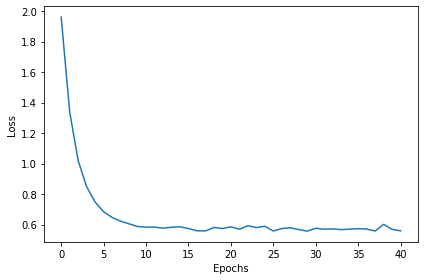

In [51]:
%matplotlib inline
loss_values = nn_h2.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [52]:
y_train_pred = nn_h2.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 80.23%


In [53]:
y_test_pred = nn_h2.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 78.68%


In [54]:
nn_h3 = MLPClassifier(hidden_layer_sizes=(100,50,20), # 3 hidden layer, 100, 50 and 20 neurons
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h3 = dt.datetime.now()
nn_h3.fit(X_train, y_train)
end_nn_h3 = dt.datetime.now()
epochs_nn_h3 = nn_h3.n_iter_

Iteration 1, loss = 2.29356940
Iteration 2, loss = 2.24060741
Iteration 3, loss = 2.03397257
Iteration 4, loss = 1.71516257
Iteration 5, loss = 1.52964479
Iteration 6, loss = 1.40241854
Iteration 7, loss = 1.29775074
Iteration 8, loss = 1.20691459
Iteration 9, loss = 1.12533296
Iteration 10, loss = 1.05525111
Iteration 11, loss = 1.00185590
Iteration 12, loss = 0.96993553
Iteration 13, loss = 0.92867834
Iteration 14, loss = 0.89520309
Iteration 15, loss = 0.87298778
Iteration 16, loss = 0.85476726
Iteration 17, loss = 0.83559815
Iteration 18, loss = 0.82829530
Iteration 19, loss = 0.82269073
Iteration 20, loss = 0.82619843
Iteration 21, loss = 0.81545882
Iteration 22, loss = 0.81476625
Iteration 23, loss = 0.80106751
Iteration 24, loss = 0.80778717
Iteration 25, loss = 0.79809921
Iteration 26, loss = 0.79507724
Iteration 27, loss = 0.79135435
Iteration 28, loss = 0.79207303
Iteration 29, loss = 0.78752057
Iteration 30, loss = 0.80638569
Iteration 31, loss = 0.78683244
Iteration 32, los

In [55]:
print('It took {} to train the neural network'.format(end_nn_h3-start_nn_h3))

It took 0:03:06.247896 to train the neural network


In [56]:
epochs_nn_h3

97

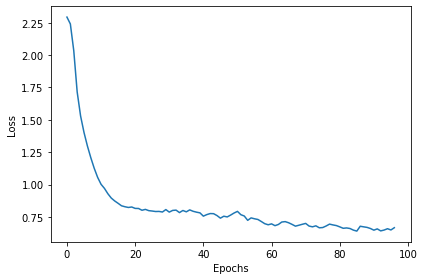

In [57]:
%matplotlib inline
loss_values = nn_h3.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [58]:
y_train_pred = nn_h3.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 76.28%


In [59]:
y_test_pred = nn_h3.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 75.25%


In [60]:
nn_h4 = MLPClassifier(hidden_layer_sizes=(100,60,30,10), # 4 hidden layer, 100, 60, 30 and 10 neurons
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h4 = dt.datetime.now()
nn_h4.fit(X_train, y_train)
end_nn_h4 = dt.datetime.now()
epochs_nn_h4 = nn_h4.n_iter_

Iteration 1, loss = 2.31098564
Iteration 2, loss = 2.30295894
Iteration 3, loss = 2.30234482
Iteration 4, loss = 2.30169474
Iteration 5, loss = 2.30076462
Iteration 6, loss = 2.29937642
Iteration 7, loss = 2.29696584
Iteration 8, loss = 2.29194395
Iteration 9, loss = 2.27913479
Iteration 10, loss = 2.23013748
Iteration 11, loss = 2.05209574
Iteration 12, loss = 1.83695351
Iteration 13, loss = 1.74421467
Iteration 14, loss = 1.70442221
Iteration 15, loss = 1.67568030
Iteration 16, loss = 1.64559831
Iteration 17, loss = 1.61311849
Iteration 18, loss = 1.57441928
Iteration 19, loss = 1.52595148
Iteration 20, loss = 1.47515551
Iteration 21, loss = 1.43072834
Iteration 22, loss = 1.39505506
Iteration 23, loss = 1.36703454
Iteration 24, loss = 1.34390079
Iteration 25, loss = 1.32264906
Iteration 26, loss = 1.30592811
Iteration 27, loss = 1.28609613
Iteration 28, loss = 1.26946707
Iteration 29, loss = 1.25036815
Iteration 30, loss = 1.23513776
Iteration 31, loss = 1.21893197
Iteration 32, los

In [61]:
print('It took {} to train the neural network'.format(end_nn_h4-start_nn_h4))

It took 0:04:01.918205 to train the neural network


In [62]:
epochs_nn_h4

119

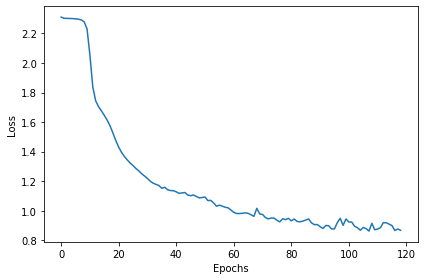

In [63]:
%matplotlib inline
loss_values = nn_h4.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [64]:
y_train_pred = nn_h4.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 65.90%


In [65]:
y_test_pred = nn_h4.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 65.01%


In [6]:
nn_h3_50 = MLPClassifier(hidden_layer_sizes=(50,100,50), # 3 hidden layer, 50, 100 and 50
                   activation='logistic',
                   solver='sgd',
                   alpha=0.001,
                   batch_size=50,
                   learning_rate='constant',
#                   learning_rate='invscaling',
                   learning_rate_init=0.001,
#                   power_t=0.00001,
                   max_iter=1000,
                   verbose=True,
                   random_state=1)

start_nn_h3_50 = dt.datetime.now()
nn_h3_50.fit(X_train, y_train)
end_nn_h3_50 = dt.datetime.now()
epochs_nn_h3_50 = nn_h3_50.n_iter_

Iteration 1, loss = 2.29559511
Iteration 2, loss = 2.26128743
Iteration 3, loss = 2.09437953
Iteration 4, loss = 1.76792591
Iteration 5, loss = 1.62761909
Iteration 6, loss = 1.52246347
Iteration 7, loss = 1.41610390
Iteration 8, loss = 1.34135923
Iteration 9, loss = 1.29154406
Iteration 10, loss = 1.24607703
Iteration 11, loss = 1.19806176
Iteration 12, loss = 1.15582836
Iteration 13, loss = 1.10899517
Iteration 14, loss = 1.05790438
Iteration 15, loss = 1.00876303
Iteration 16, loss = 0.94449354
Iteration 17, loss = 0.89495726
Iteration 18, loss = 0.85491630
Iteration 19, loss = 0.84015203
Iteration 20, loss = 0.82287052
Iteration 21, loss = 0.80659082
Iteration 22, loss = 0.79177801
Iteration 23, loss = 0.78905031
Iteration 24, loss = 0.78605467
Iteration 25, loss = 0.74206258
Iteration 26, loss = 0.75858194
Iteration 27, loss = 0.74738956
Iteration 28, loss = 0.73479306
Iteration 29, loss = 0.73921265
Iteration 30, loss = 0.74685640
Iteration 31, loss = 0.73164082
Iteration 32, los

In [8]:
print('It took {} to train the neural network'.format(end_nn_h3_50-start_nn_h3_50))

It took 0:02:13.246119 to train the neural network


In [9]:
epochs_nn_h3_50

87

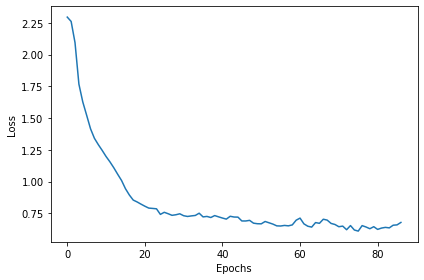

In [10]:
%matplotlib inline
loss_values = nn_h3_50.loss_curve_
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values)
# plt.plot(range(len(nn.loss_)), nn.loss_)
# plt.ylim([0, 2000])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [11]:
y_train_pred = nn_h3_50.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 77.25%


In [12]:
y_test_pred = nn_h3_50.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 76.23%


### Visualize 20 misclassifications ...
... and state an opinion on these

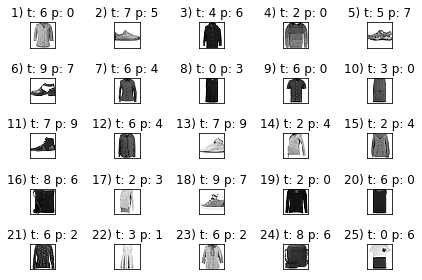

In [13]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

From my point of view ...

various misclassifications occured. For instance a sneaker was classified as sandal (5) and a dress as trousers (22). Tweaking the number of hidden layers and the amount of neurons in a layer has a huge impact on accuracy and computation time.